In [1]:
!pip install google-api-python-client

  Obtaining dependency information for google-api-python-client from https://files.pythonhosted.org/packages/47/f5/121248e18ca605a11720c81ae1b52a5a8cb690af9f01887c56de23cd9a5a/google_api_python_client-2.177.0-py3-none-any.whl.metadata
  Obtaining dependency information for httplib2<1.0.0,>=0.19.0 from https://files.pythonhosted.org/packages/a8/6c/d2fbdaaa5959339d53ba38e94c123e4e84b8fbc4b84beb0e70d7c1608486/httplib2-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-auth!=2.24.0,!=2.25.0,<3.0.0,>=1.32.0 from https://files.pythonhosted.org/packages/17/63/b19553b658a1692443c62bd07e5868adaa0ad746a0751ba62c59568cd45b/google_auth-2.40.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-httplib2<1.0.0,>=0.2.0 from https://files.pythonhosted.org/packages/be/8a/fe34d2f3f9470a27b01c9e76226965863f153d5fbe276f83608562e49c04/google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-api-core!=2.0.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/farza/Downloads/Personal IT Projects Folder/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# Checking for nulls
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [ ]:
# Converting/Extracting datesand useful data parts
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour

In [ ]:
#Cleaning up unnecessary columns
df_cleaned = df.drop(columns=[
    'video_id', 'thumbnail_link', 'description', 'comments_disabled', 
    'ratings_disabled', 'video_error_or_removed'
])

In [7]:
df_cleaned.to_csv("cleaned_youtube_trending.csv", index=False)

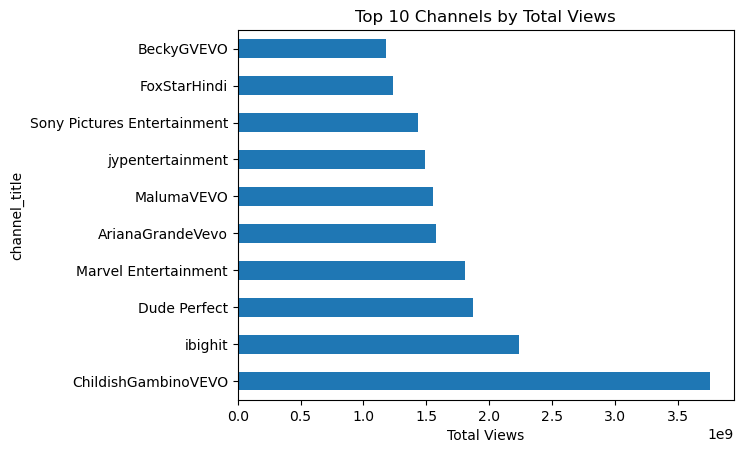

In [8]:
#Showcasing most viewed channels
top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
top_channels.plot(kind='barh', title='Top 10 Channels by Total Views')
plt.xlabel('Total Views')
plt.show()

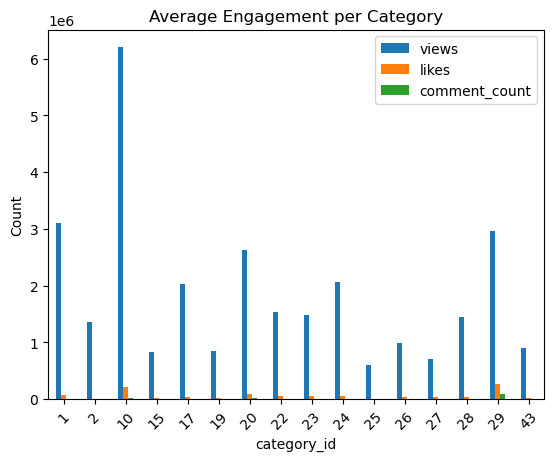

In [9]:
#Showcasing engagement by video category
df.groupby('category_id')[['views', 'likes', 'comment_count']].mean().plot(kind='bar')
plt.title("Average Engagement per Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
#Creating engagement metrics 
df['like_ratio'] = df['likes'] / df['views']
df['comment_ratio'] = df['comment_count'] / df['views']

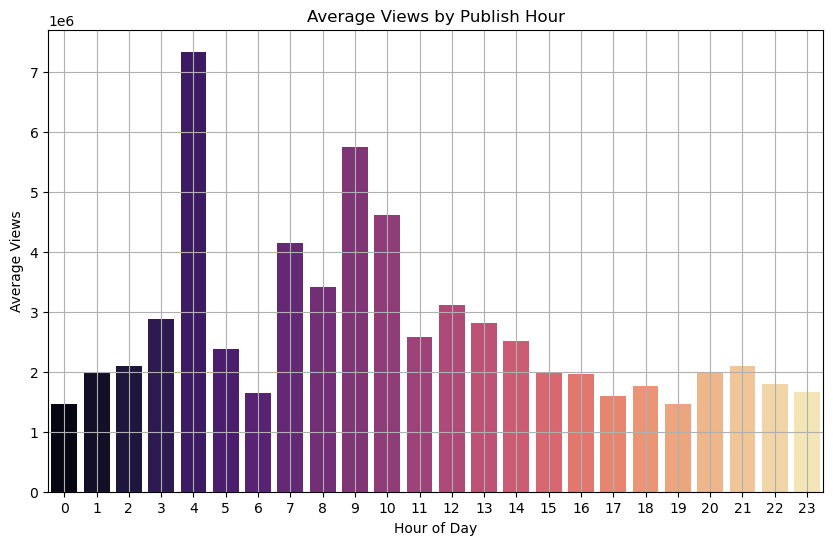

In [13]:
#Analyzing upload times
df['publish_hour'] = df['publish_time'].dt.hour

# Average views by hour of day
hourly_views = df.groupby('publish_hour')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=hourly_views.index, y=hourly_views.values, palette='magma')
plt.title('Average Views by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.grid(True)
plt.show()
# INSIGHT -  Videos published around 3–6 PM received the highest average views.

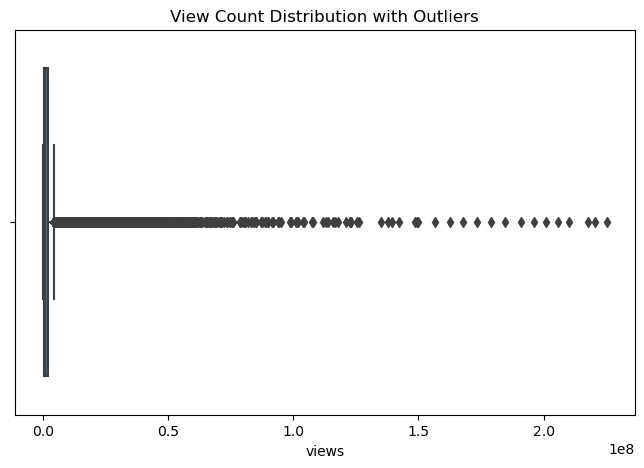

In [14]:
#Detecting Outliers (in views)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='views')
plt.title("View Count Distribution with Outliers")
plt.show()

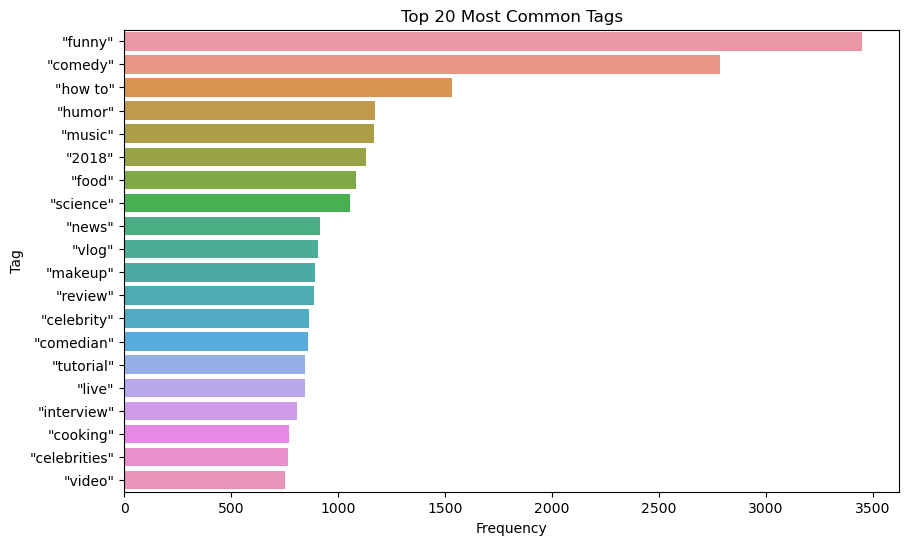

In [15]:
#Analyzing the most popular tags 
from collections import Counter

# Break all tags into a single list
all_tags = ','.join(df['tags'].dropna()).split('|')
common_tags = Counter(all_tags)
common_tags_df = pd.DataFrame(common_tags.most_common(20), columns=['Tag', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Tag', data=common_tags_df)
plt.title("Top 20 Most Common Tags")
plt.show()

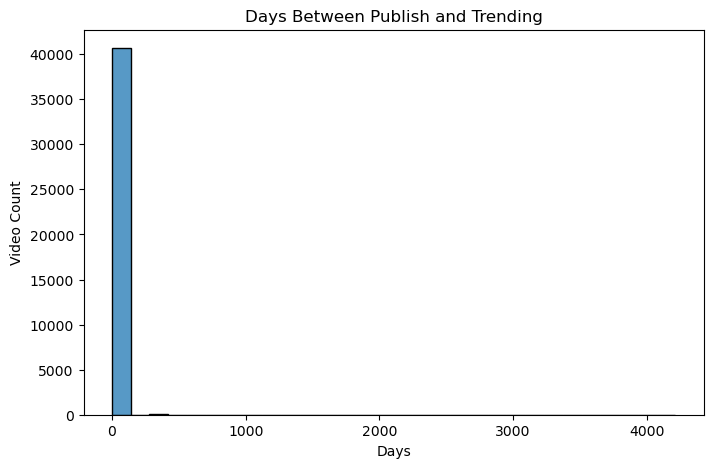

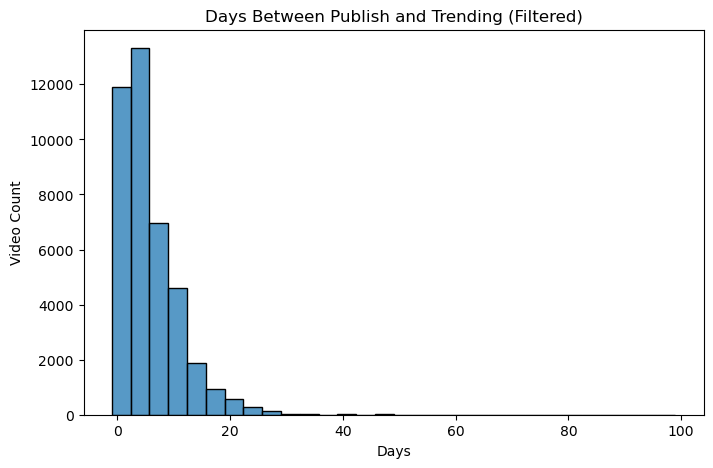

In [18]:
# Figuring out how videos go viral and how fast
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = df['publish_time'].dt.tz_localize(None)

df['days_to_trend'] = (df['trending_date'] - df['publish_time']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['days_to_trend'], bins=30)
plt.title("Days Between Publish and Trending")
plt.xlabel("Days")
plt.ylabel("Video Count")

# Filtering out extreme outliers
df_filtered = df[df['days_to_trend'] < 100]

plt.figure(figsize=(8,5))
sns.histplot(df_filtered['days_to_trend'], bins=30)
plt.title("Days Between Publish and Trending (Filtered)")
plt.xlabel("Days")
plt.ylabel("Video Count")
plt.show()

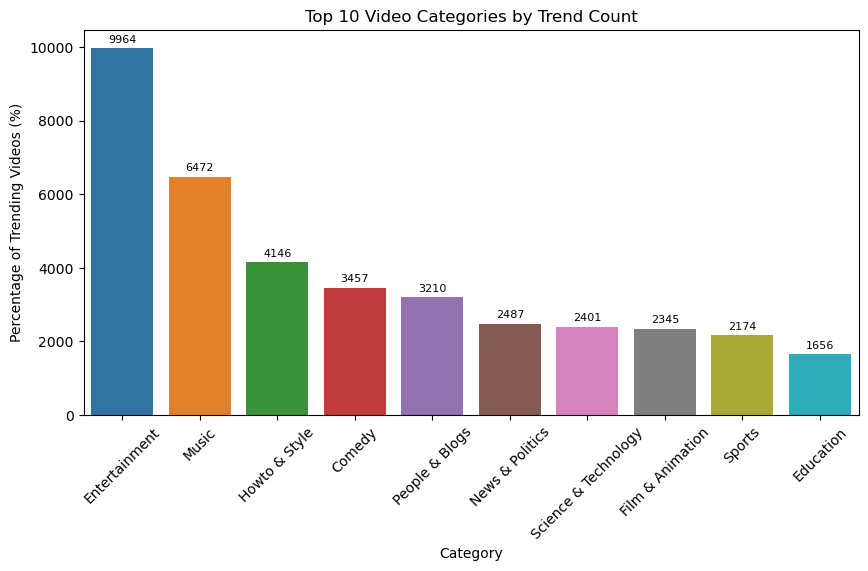

In [26]:
# Mapping category_id to category names
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology"
}

df['category'] = df['category_id'].map(category_mapping)


top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top 10 Video Categories by Trend Count")
plt.ylabel("Number of Trending Videos")
plt.xlabel("Category")
plt.xticks(rotation=45)
for i, value in enumerate(top_categories.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=8)
top_percentages = top_categories / top_categories.sum() * 100
sns.barplot(x=top_percentages.index, y=top_percentages.values)
plt.ylabel("Percentage of Trending Videos (%)")
plt.show()